In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 20)
plt.rcParams["figure.figsize"] = (12,8)


In [2]:
# Read the datafile "county_election_train.csv" as a Pandas dataframe
elect_train = pd.read_csv("data/county_election_train.csv")

# Read the datafile "county_election_test.csv" as a Pandas dataframe
elect_test = pd.read_csv("data/county_election_test.csv")

# Take a quick look at the dataframe
elect_train.head()


,state,fipscode,county,population,hispanic,minority,female,unemployed,income,nodegree,bachelor,inactivity,obesity,density,cancer,trump,clinton,votergap
0,Alabama,1001,Autauga County,50756,2.842,22.733,51.475,5.2,54366,13.8,21.9,28.6,34.1,91.8,186.5,73.436,23.957,49.479
1,Alabama,1003,Baldwin County,179878,4.550,12.934,51.261,5.5,49626,11.0,28.6,22.3,27.4,114.6,229.4,77.351,19.565,57.786
2,Alabama,1007,Bibb County,21587,2.409,23.930,46.110,6.6,39546,22.1,10.2,33.9,40.3,36.8,230.3,76.966,21.422,55.544
3,Alabama,1009,Blount County,58345,8.954,4.229,50.592,5.4,45567,21.9,12.3,28.0,34.6,88.9,205.3,89.852,8.470,81.382
4,Alabama,1011,Bullock County,10985,7.526,72.831,45.241,7.8,26580,34.5,14.1,31.7,43.0,17.5,211.2,24.229,75.090,-50.862


In [3]:
### edTest(test_response) ###

# Create the response variable for the training data
y_train = (elect_train['trump'] > elect_train['clinton']).astype(int)

# Create the response variable for the test data
y_test = (elect_test['trump'] > elect_test['clinton']).astype(int)


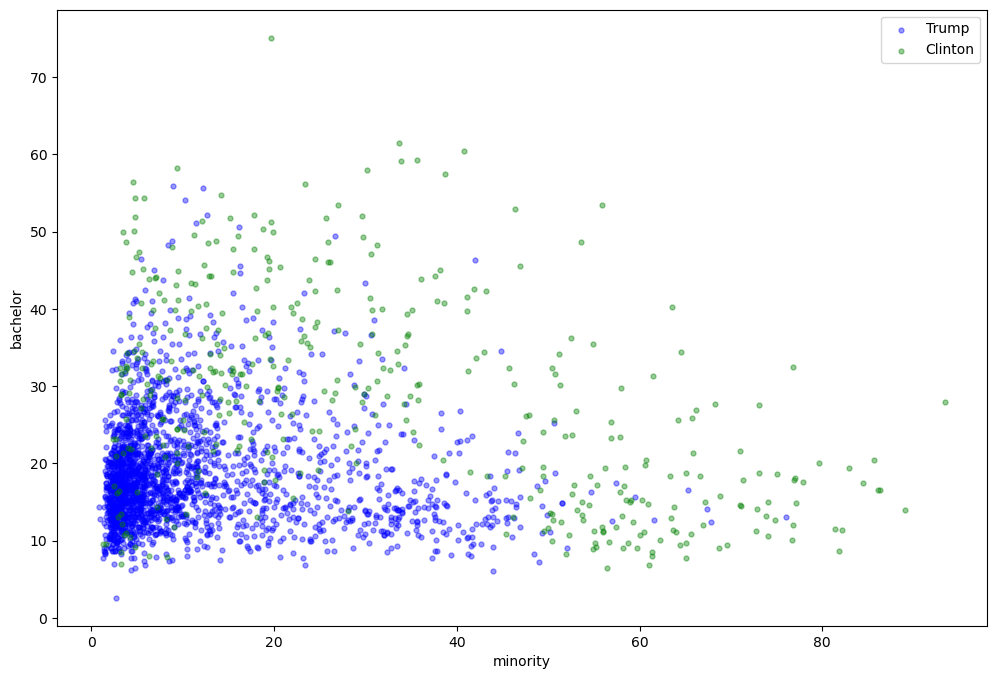

In [4]:
# Plot "minority" vs "bachelor" from the train data for Trump and Clinton
# Plot minority on the x-axis and bachelor on the y-axis
# Use different colours to depict data points associated with Trump and Clinton

plt.scatter(elect_train['minority'][y_train == 1], elect_train['bachelor'][y_train == 1], marker=".", color="blue", label="Trump", s=50, alpha=0.4)
plt.scatter(elect_train['minority'][y_train == 0], elect_train['bachelor'][y_train == 0], marker=".", color="green", label="Clinton", s=50, alpha=0.4)

plt.xlabel("minority")
plt.ylabel("bachelor")
plt.legend()
plt.show()


In [5]:
### edTest(test_model) ###
# Initialize the Decision Tree classifier with depth 3 and Gini criterion
dtree = DecisionTreeClassifier(max_depth=3, criterion='gini')

# Fit the classifier on the training data, using only the "minority" column as the predictor
dtree.fit(elect_train[['minority']], y_train)


DecisionTreeClassifier(max_depth=3)

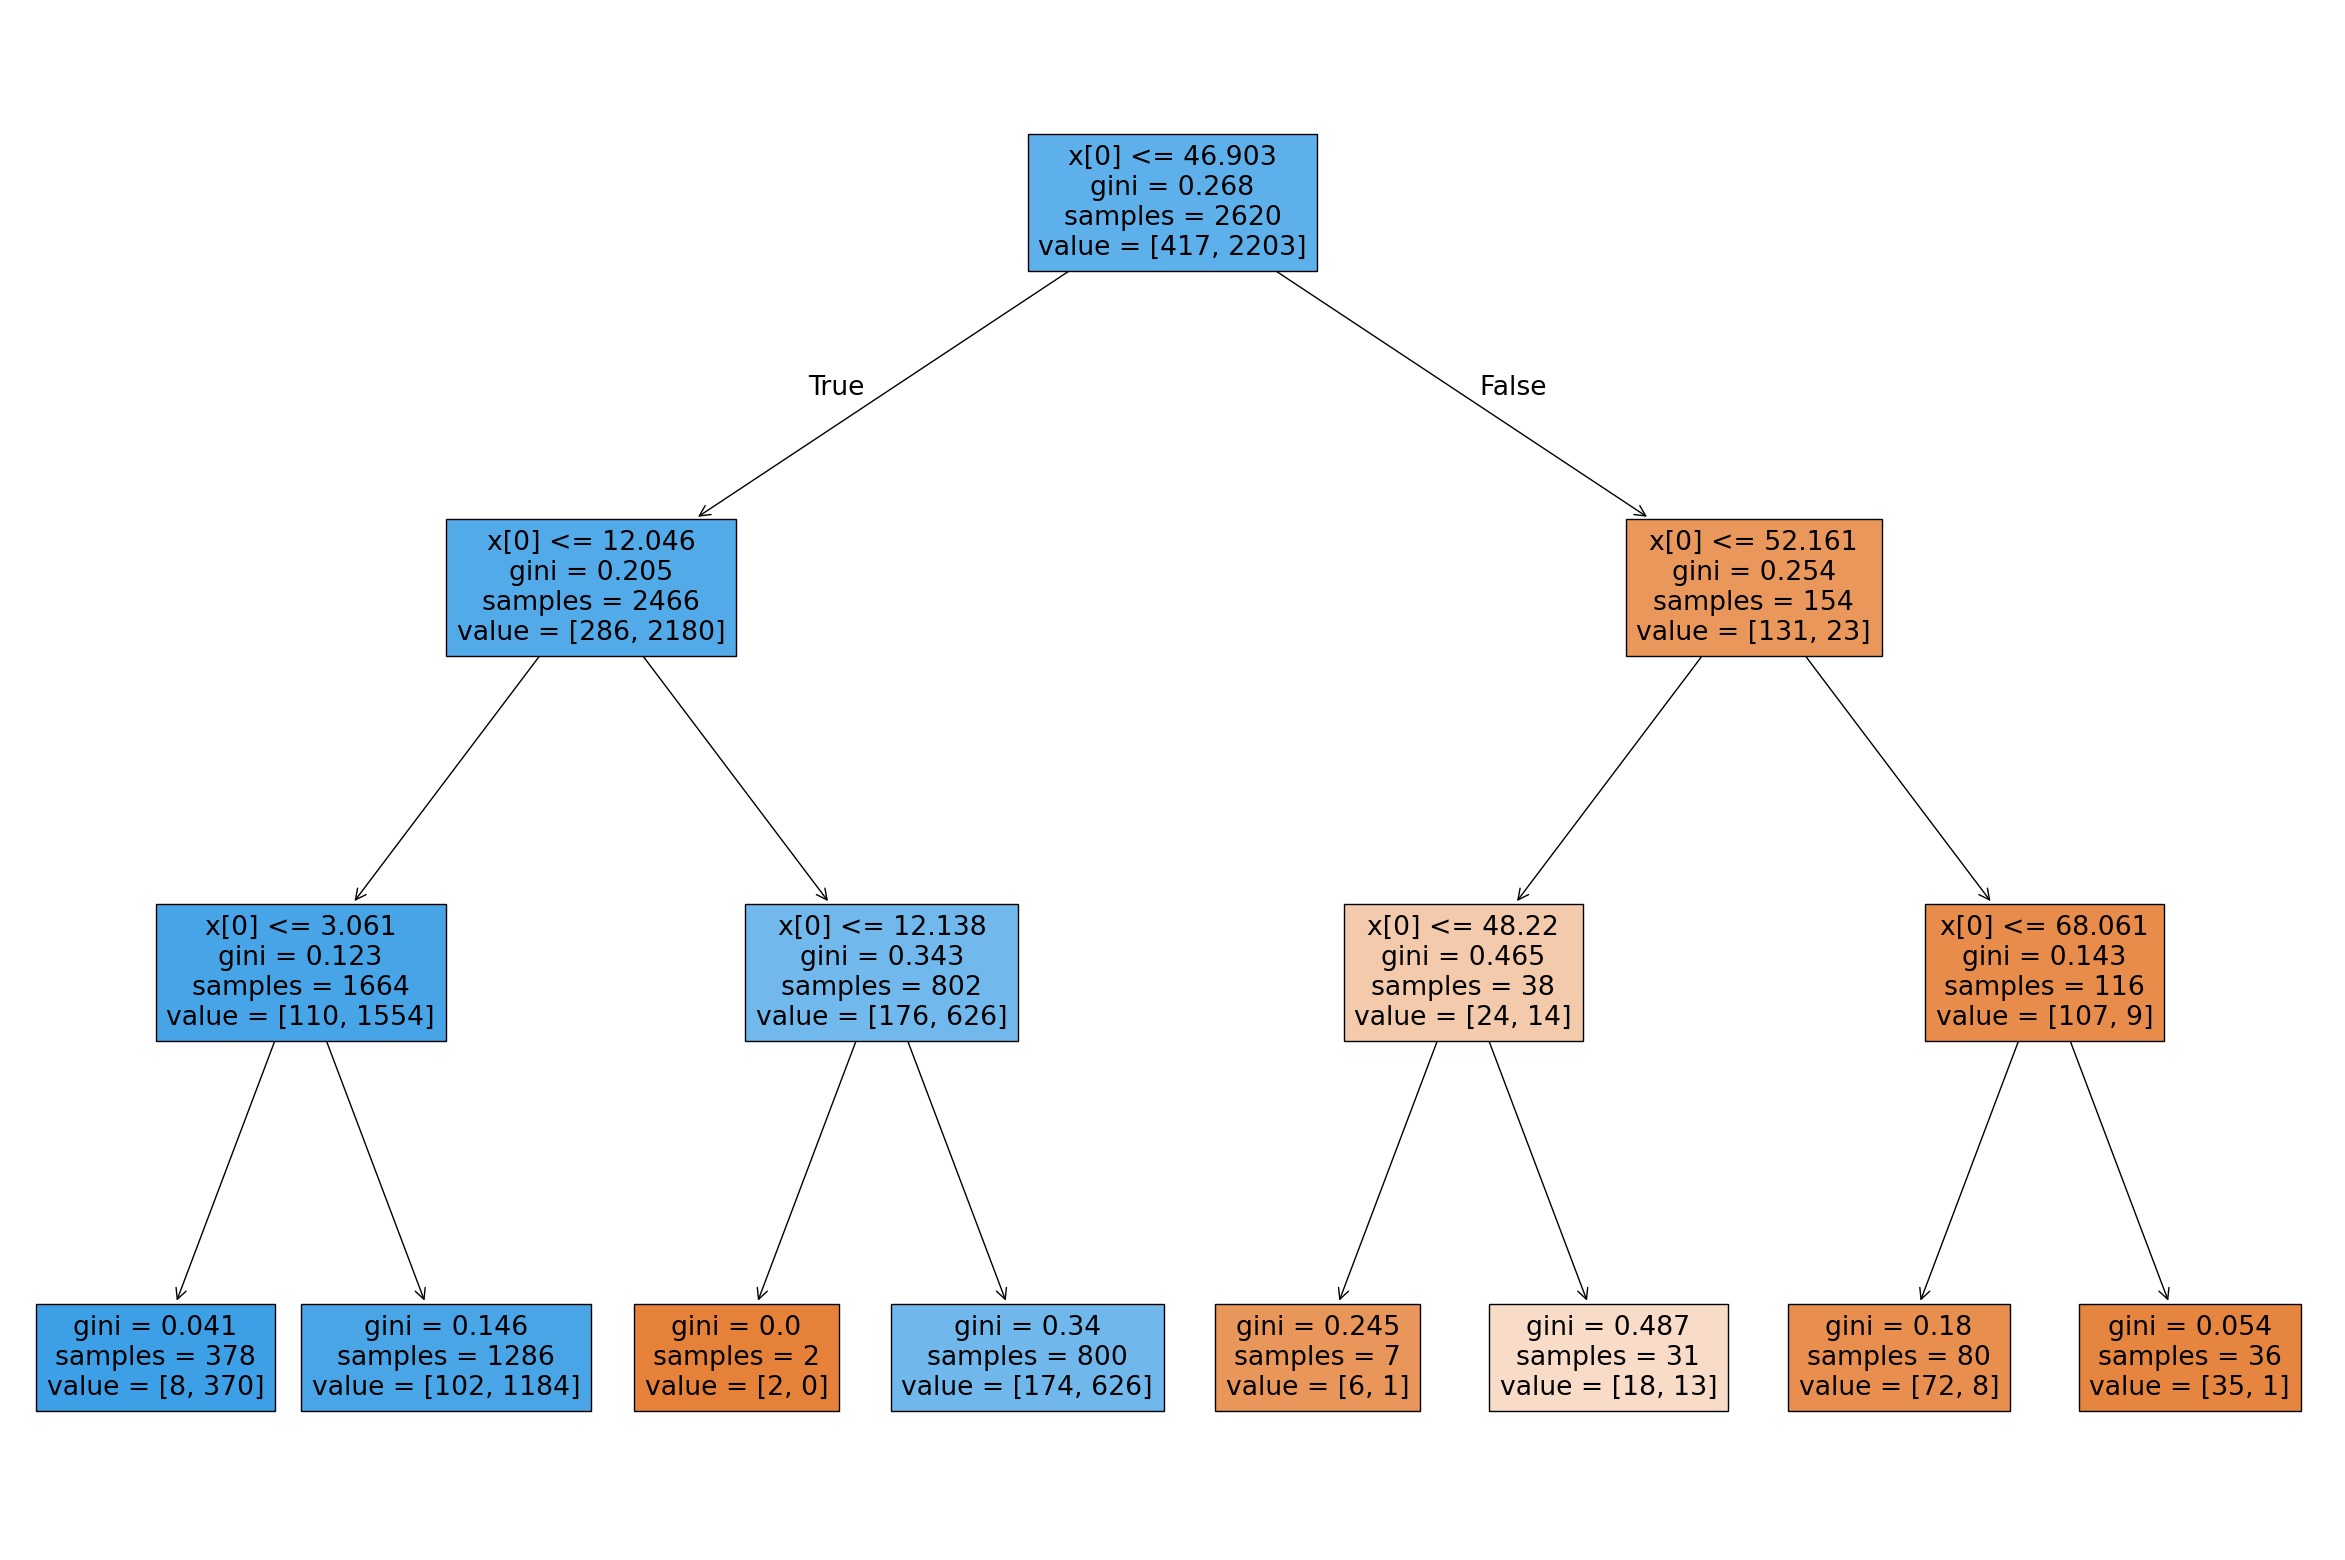

In [6]:
# Set the size of the plot
plt.figure(figsize=(30,20))

# Plot the trained Decision Tree
tree.plot_tree(dtree, filled=True)

# Show the plot
plt.show()
